In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


import os
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore


import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity

In [140]:
# Get the CSV data here and print head
df= pd.read_csv('flight_dataset.csv')
df.head()

,Airline_Names,Departure_Time,Arrival_Time,Flight_Duration,Source_Place,Destination_Place,Meal_Availability,Number_Of_Stops,Flight_Prices
0,Air Asia,12:40,20:15,7h 35m,New Delhi,Mumbai,No Meal Fare,1 Stop,"5,953"
1,Air Asia,11:55,20:15,8h 20m,New Delhi,Mumbai,No Meal Fare,1 Stop,"5,953"
2,Air Asia,16:15,06:20,14h 05m,New Delhi,Mumbai,No Meal Fare,1 Stop,"5,953"
3,Go First,18:50,20:45,1h 55m,New Delhi,Mumbai,No Meal Fare,Non Stop,"5,954"
4,Go First,09:05,11:05,2h 00m,New Delhi,Mumbai,No Meal Fare,Non Stop,"5,954"


In [141]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df["Departure_Hour"] = pd.to_datetime(df["Departure_Time"]).dt.hour


In [142]:
# Extracting Minutes
df["Departure_Min"] = pd.to_datetime(df["Departure_Time"]).dt.minute

In [143]:
#dropping the  depature column
df.drop('Departure_Time',axis=1,inplace=True)


In [144]:
#Flight_Duration
# Extracting Hours
df["Arrival_Time_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
# Extracting Minutes
df["Arrival_Time_Min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

In [145]:
# dropping the arrival column
df.drop('Arrival_Time',axis=1,inplace=True)

In [146]:
# flight duration conversion 

df["FD_Hour"] = df.Flight_Duration.str.split('h').str.get(0)
df["FD_Min"] = df.Flight_Duration.str.split('h').str.get(1)
df["FD_Min"] = df["FD_Min"].str.split('m').str.get(0)
df["FD_Hour"] = df['FD_Hour'].astype('float')
df["FD_Min"] = df['FD_Min'].astype('float')
df["Flight_Duration"] = df["FD_Hour"] + df["FD_Min"] / 60
df.head()

,Airline_Names,Flight_Duration,Source_Place,Destination_Place,Meal_Availability,Number_Of_Stops,Flight_Prices,Departure_Hour,Departure_Min,Arrival_Time_Hour,Arrival_Time_Min,FD_Hour,FD_Min
0,Air Asia,7.583333,New Delhi,Mumbai,No Meal Fare,1 Stop,"5,953",12,40,20,15,7.0,35.0
1,Air Asia,8.333333,New Delhi,Mumbai,No Meal Fare,1 Stop,"5,953",11,55,20,15,8.0,20.0
2,Air Asia,14.083333,New Delhi,Mumbai,No Meal Fare,1 Stop,"5,953",16,15,6,20,14.0,5.0
3,Go First,1.916667,New Delhi,Mumbai,No Meal Fare,Non Stop,"5,954",18,50,20,45,1.0,55.0
4,Go First,2.000000,New Delhi,Mumbai,No Meal Fare,Non Stop,"5,954",9,5,11,5,2.0,0.0


In [147]:
#dropping flight duration
# dropping the arrival column
df.drop('Flight_Duration',axis=1,inplace=True)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5805 entries, 0 to 5804
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline_Names      5805 non-null   object 
 1   Source_Place       5805 non-null   object 
 2   Destination_Place  5805 non-null   object 
 3   Meal_Availability  5805 non-null   object 
 4   Number_Of_Stops    5805 non-null   object 
 5   Flight_Prices      5805 non-null   object 
 6   Departure_Hour     5805 non-null   int64  
 7   Departure_Min      5805 non-null   int64  
 8   Arrival_Time_Hour  5805 non-null   int64  
 9   Arrival_Time_Min   5805 non-null   int64  
 10  FD_Hour            5805 non-null   float64
 11  FD_Min             5805 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 544.3+ KB


In [149]:
#finding unique values in object data types
def explore_object_type(df,feature_name):
    if df[feature_name].dtype == 'object':
        print(df[feature_name].value_counts())

In [150]:
for featureName in df:
    if df[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(df, str(featureName))


"Airline_Names's" Values with count are :
IndiGo       1782
Air India    1638
Vistara      1514
Go First      492
Air Asia      213
SpiceJet      166
Name: Airline_Names, dtype: int64

"Source_Place's" Values with count are :
Mumbai       806
Bangalore    755
New Delhi    748
Kolkata      744
Hyderabad    614
Goa          612
Chennai      580
Lucknow      519
Jaipur       427
Name: Source_Place, dtype: int64

"Destination_Place's" Values with count are :
Mumbai       805
Bangalore    786
Hyderabad    759
New Delhi    727
Kolkata      710
Chennai      648
Goa          545
Lucknow      521
Jaipur       304
Name: Destination_Place, dtype: int64

"Meal_Availability's" Values with count are :
No Meal Fare    4252
Free Meal       1014
eCash 250        539
Name: Meal_Availability, dtype: int64

"Number_Of_Stops's" Values with count are :
1 Stop       3696
2 Stop(s)    1154
Non Stop      693
3 Stop(s)     244
4 Stop(s)      18
Name: Number_Of_Stops, dtype: int64

"Flight_Prices's" Values with

In [151]:
#converting Driven Kilometers to numerical as it is listed in object type of data as listed above
try:
    df['Flight_Prices'] = df['Flight_Prices'].astype(float)
except ValueError as ve:
    print (ve)

could not convert string to float: '5,953'


In [152]:
#removing unique features in flight column- by removing ','-  comma
df['Flight_Prices'] = df['Flight_Prices'].str.replace(',', '')

In [153]:
df['Flight_Prices']

0        5953
1        5953
2        5953
3        5954
4        5954
        ...  
5800     9302
5801    16287
5802    16865
5803    16865
5804    19749
Name: Flight_Prices, Length: 5805, dtype: object

In [154]:
#converting flight prices feature column to float
try:
    df['Flight_Prices'] = df['Flight_Prices'].astype(float)
except ValueError as ve:
    print (ve)

In [155]:
df.describe(include=['object','datetime']).transpose()

,count,unique,top,freq
Airline_Names,5805,6,IndiGo,1782
Source_Place,5805,9,Mumbai,806
Destination_Place,5805,9,Mumbai,805
Meal_Availability,5805,3,No Meal Fare,4252
Number_Of_Stops,5805,5,1 Stop,3696


In [156]:
#as we can see that 1 Stop is the  most preferred way to travel by most passengers
#as we can see Indigo seems to be the mlst popular airline among cutomers
#Mumbai seems to be the most commonly used source place for ost passengers
#Mumbai seems to be the mst ppular destination 
#Most customers have opted for 'no meals fare' on flight as their meal preference

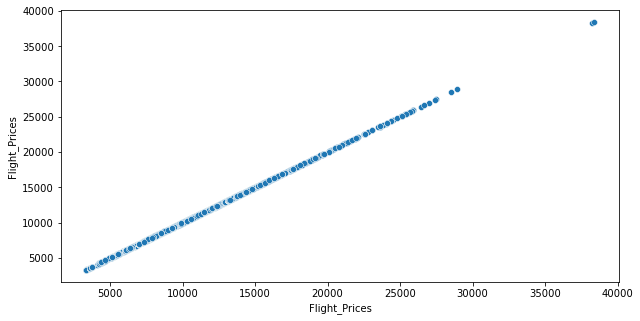

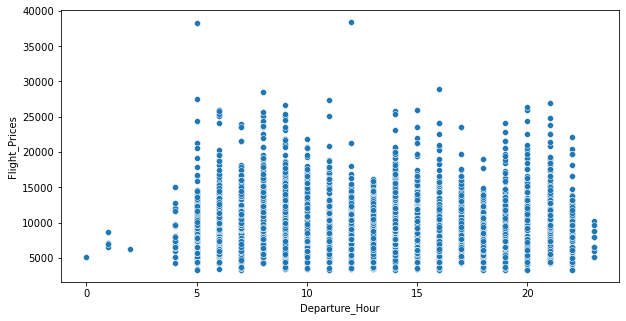

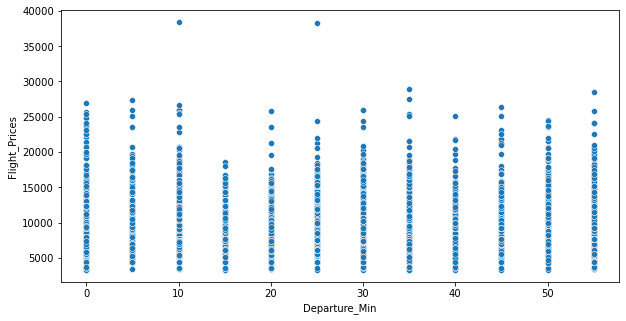

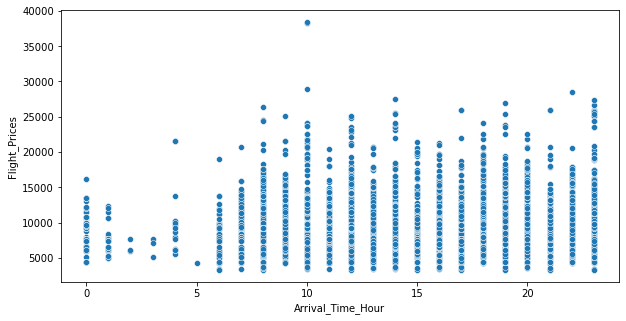

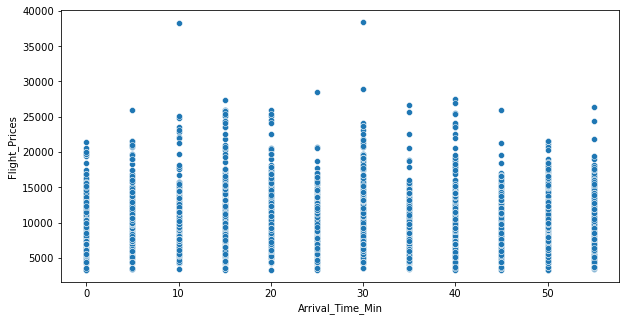

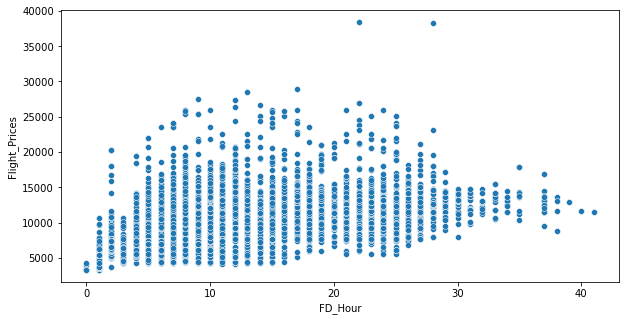

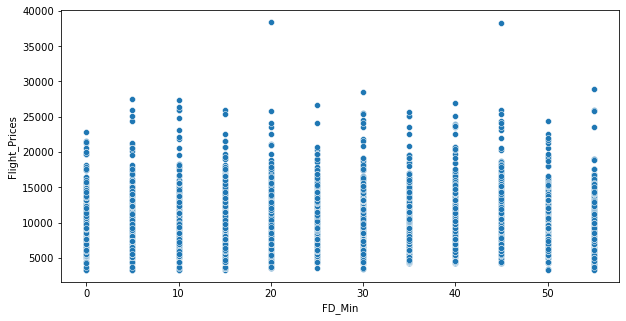

In [157]:
#measuring flight price with all other columns:
for col in df.columns:
    if df[col].dtype != 'object':
        plt.figure(figsize=(10,5))
        sns.scatterplot(x=col,y='Flight_Prices',data=df)

<AxesSubplot:>

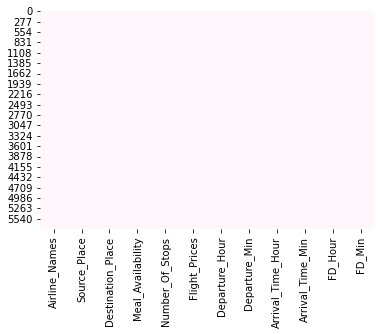

In [158]:
#checking for any missing data
# Missing Data Pattern 
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

In [159]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()
#as we can see, there are no missing values

,Total,Percent
Airline_Names,0,0.0
Source_Place,0,0.0
Destination_Place,0,0.0
Meal_Availability,0,0.0
Number_Of_Stops,0,0.0


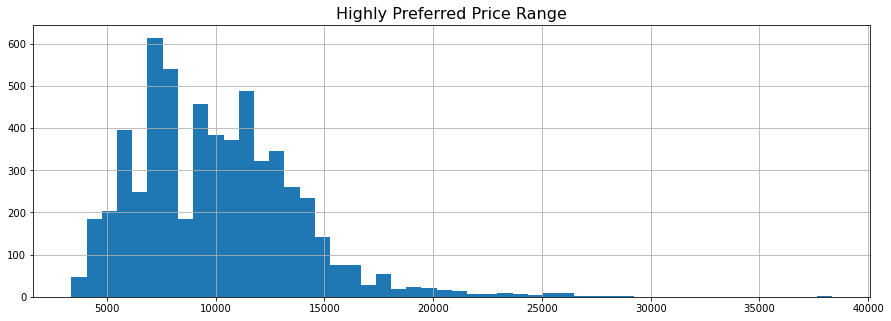

In [160]:
df["Flight_Prices"].hist(bins=50, figsize=(15, 5))
plt.title("Highly Preferred Price Range", fontsize=16);

In [161]:
#label ensoding 
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [162]:
df.head()

,Airline_Names,Source_Place,Destination_Place,Meal_Availability,Number_Of_Stops,Flight_Prices,Departure_Hour,Departure_Min,Arrival_Time_Hour,Arrival_Time_Min,FD_Hour,FD_Min
0,0,8,7,1,0,5953.0,12,40,20,15,7.0,35.0
1,0,8,7,1,0,5953.0,11,55,20,15,8.0,20.0
2,0,8,7,1,0,5953.0,16,15,6,20,14.0,5.0
3,2,8,7,1,4,5954.0,18,50,20,45,1.0,55.0
4,2,8,7,1,4,5954.0,9,5,11,5,2.0,0.0


<AxesSubplot:>

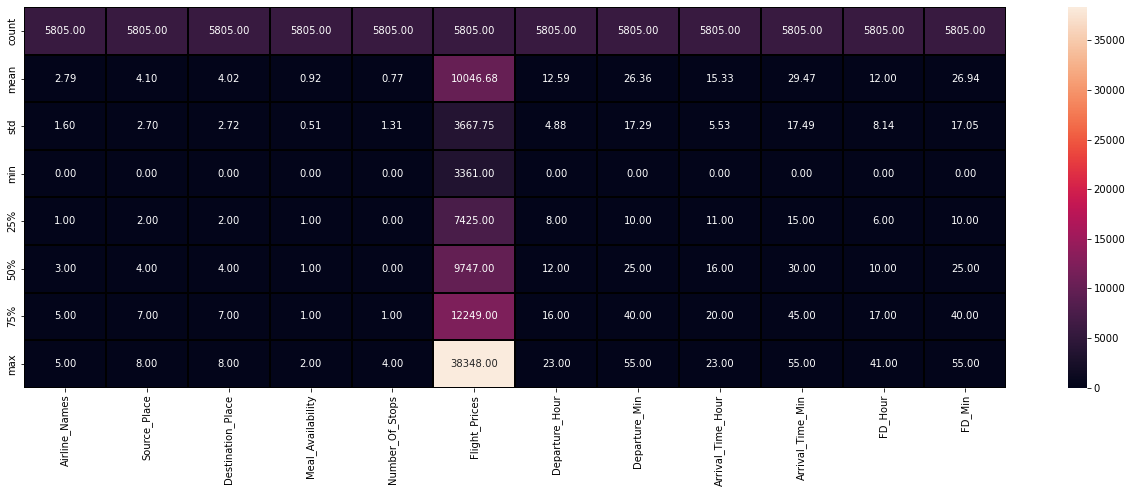

In [163]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

<AxesSubplot:>

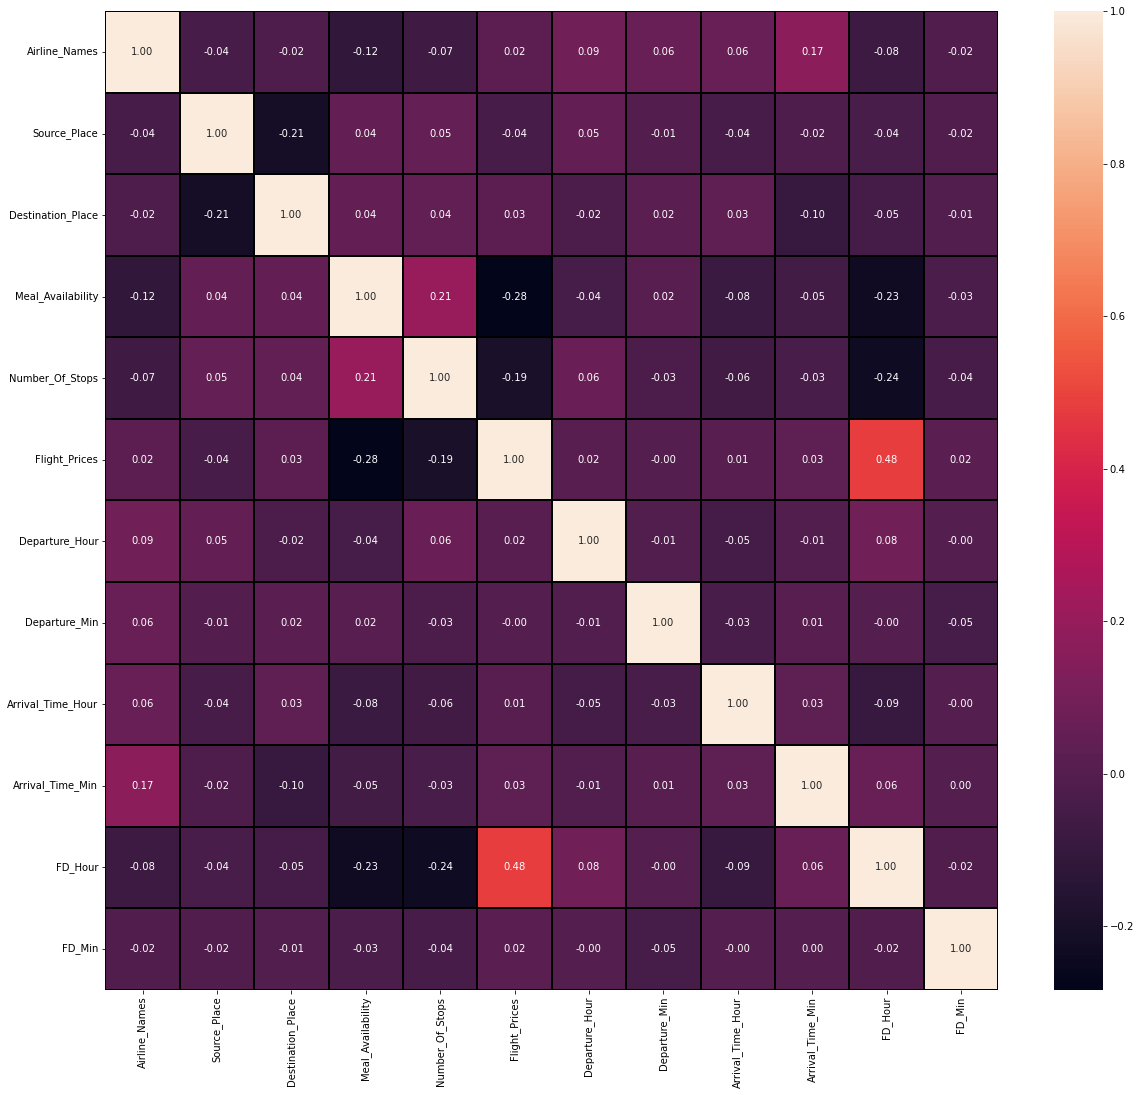

In [164]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [119]:
#RELATION WITH Price
corr_matrix=df.corr()
corr_matrix["Flight_Prices"].sort_values(ascending=False)

Flight_Prices        1.000000
Flight_Duration      0.483379
FD_Hour              0.482732
Arrival_Time_Min     0.031590
Destination_Place    0.025163
Airline_Names        0.023058
FD_Min               0.019550
Departure_Hour       0.015430
Arrival_Time_Hour    0.008897
Departure_Min       -0.001154
Source_Place        -0.040575
Number_Of_Stops     -0.194510
Meal_Availability   -0.283551
Name: Flight_Prices, dtype: float64

In [ ]:
# FD_Hour have a strong relation

In [165]:
#checking skewness
df.skew()

Airline_Names        0.097880
Source_Place        -0.069663
Destination_Place   -0.024310
Meal_Availability   -0.129523
Number_Of_Stops      1.717912
Flight_Prices        1.055364
Departure_Hour       0.221858
Departure_Min        0.059660
Arrival_Time_Hour   -0.526934
Arrival_Time_Min    -0.142671
FD_Hour              0.736539
FD_Min               0.041972
dtype: float64

In [ ]:
# soem of the features seems to eb skewed
Number_Of_Stops , Airline_Names,Source_Place       

In [169]:
#dividing data
X = df.drop(['Flight_Prices'], axis=1)
y=df['Flight_Prices']

In [170]:
#Transforming data to remove skewness:
from sklearn.preprocessing import power_transform
X_new=power_transform(X)

In [171]:
X_new

array([[-2.00971958,  1.35621525,  1.0586791 , ..., -0.74850457,
        -0.47161052,  0.53763865],
       [-2.00971958,  1.35621525,  1.0586791 , ..., -0.74850457,
        -0.31396595, -0.27348619],
       [-2.00971958,  1.35621525,  1.0586791 , ..., -0.44579994,
         0.44351568, -1.32579769],
       ...,
       [-1.13104658,  0.72335936,  0.08668131, ..., -0.44579994,
         0.83859759,  0.53763865],
       [-1.13104658,  0.72335936,  0.08668131, ..., -0.44579994,
         1.33670822,  0.01300152],
       [-1.13104658,  0.72335936,  0.08668131, ..., -0.44579994,
         0.74555809,  1.24345282]])

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Scaled_X=sc.fit_transform(X_new)


In [173]:
#Transforming data to remove skewness:
Scaled_X

array([[-2.00971958,  1.35621525,  1.0586791 , ..., -0.74850457,
        -0.47161052,  0.53763865],
       [-2.00971958,  1.35621525,  1.0586791 , ..., -0.74850457,
        -0.31396595, -0.27348619],
       [-2.00971958,  1.35621525,  1.0586791 , ..., -0.44579994,
         0.44351568, -1.32579769],
       ...,
       [-1.13104658,  0.72335936,  0.08668131, ..., -0.44579994,
         0.83859759,  0.53763865],
       [-1.13104658,  0.72335936,  0.08668131, ..., -0.44579994,
         1.33670822,  0.01300152],
       [-1.13104658,  0.72335936,  0.08668131, ..., -0.44579994,
         0.74555809,  1.24345282]])

In [174]:
pd.DataFrame(Scaled_X, columns=X.columns).skew().sort_values(ascending=False)

Number_Of_Stops      0.654901
Meal_Availability    0.038766
FD_Hour             -0.056729
Departure_Hour      -0.059635
Airline_Names       -0.114412
Destination_Place   -0.228155
Source_Place        -0.241696
Arrival_Time_Hour   -0.259548
FD_Min              -0.311188
Departure_Min       -0.335628
Arrival_Time_Min    -0.369723
dtype: float64

In [175]:
X.columns

Index(['Airline_Names', 'Source_Place', 'Destination_Place',
       'Meal_Availability', 'Number_Of_Stops', 'Departure_Hour',
       'Departure_Min', 'Arrival_Time_Hour', 'Arrival_Time_Min', 'FD_Hour',
       'FD_Min'],
      dtype='object')

In [176]:
x=pd.DataFrame(Scaled_X, columns=X.columns)

In [177]:
x.columns

Index(['Airline_Names', 'Source_Place', 'Destination_Place',
       'Meal_Availability', 'Number_Of_Stops', 'Departure_Hour',
       'Departure_Min', 'Arrival_Time_Hour', 'Arrival_Time_Min', 'FD_Hour',
       'FD_Min'],
      dtype='object')

In [178]:
#using linear regression
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr=LinearRegression()

In [179]:
from sklearn.metrics import r2_score
for i in range(0,300):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train, pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.3299442874609555
At random state 0,the testing accuracy is:- 0.3207360041607623


At random state 1,the training accuracy is:- 0.3311868126120713
At random state 1,the testing accuracy is:- 0.31330730221196124


At random state 2,the training accuracy is:- 0.32093292273267293
At random state 2,the testing accuracy is:- 0.343657631030836


At random state 3,the training accuracy is:- 0.31325591627102856
At random state 3,the testing accuracy is:- 0.37466774606414976


At random state 4,the training accuracy is:- 0.31960672595101536
At random state 4,the testing accuracy is:- 0.3534929241984993


At random state 5,the training accuracy is:- 0.3245785799038424
At random state 5,the testing accuracy is:- 0.3348687728559332


At random state 6,the training accuracy is:- 0.32683316142907604
At random state 6,the testing accuracy is:- 0.3273764982082059


At random state 7,the training accuracy is:- 0.3242297592742591
At random state 7,the testin

At random state 69,the testing accuracy is:- 0.32133335293912746


At random state 70,the training accuracy is:- 0.3265965134351878
At random state 70,the testing accuracy is:- 0.3299485006298728


At random state 71,the training accuracy is:- 0.3314485568529455
At random state 71,the testing accuracy is:- 0.31580651792613723


At random state 72,the training accuracy is:- 0.3253666805053036
At random state 72,the testing accuracy is:- 0.3332324092439728


At random state 73,the training accuracy is:- 0.32311346580297906
At random state 73,the testing accuracy is:- 0.3408429346319778


At random state 74,the training accuracy is:- 0.32832881561069416
At random state 74,the testing accuracy is:- 0.32446124203556626


At random state 75,the training accuracy is:- 0.3269266992319311
At random state 75,the testing accuracy is:- 0.3265415763800774


At random state 76,the training accuracy is:- 0.33302938924460723
At random state 76,the testing accuracy is:- 0.31039996598540953


At random 

At random state 142,the training accuracy is:- 0.32295113716344437
At random state 142,the testing accuracy is:- 0.33911263395514546


At random state 143,the training accuracy is:- 0.3311857311250259
At random state 143,the testing accuracy is:- 0.31682962100111733


At random state 144,the training accuracy is:- 0.33259038488094184
At random state 144,the testing accuracy is:- 0.3114618747558937


At random state 145,the training accuracy is:- 0.3316010623719805
At random state 145,the testing accuracy is:- 0.31338054969778106


At random state 146,the training accuracy is:- 0.3347298224839238
At random state 146,the testing accuracy is:- 0.3083054847319018


At random state 147,the training accuracy is:- 0.3268526252103363
At random state 147,the testing accuracy is:- 0.3295742224859327


At random state 148,the training accuracy is:- 0.3250890910139288
At random state 148,the testing accuracy is:- 0.3333341882420435


At random state 149,the training accuracy is:- 0.337416758389247

At random state 205,the training accuracy is:- 0.3408492350230622
At random state 205,the testing accuracy is:- 0.2878885827659581


At random state 206,the training accuracy is:- 0.33563340888288373
At random state 206,the testing accuracy is:- 0.3045433095255613


At random state 207,the training accuracy is:- 0.32799406140160714
At random state 207,the testing accuracy is:- 0.324492307717417


At random state 208,the training accuracy is:- 0.33767534197990023
At random state 208,the testing accuracy is:- 0.2920505664421592


At random state 209,the training accuracy is:- 0.33775632505022235
At random state 209,the testing accuracy is:- 0.29900294118904247


At random state 210,the training accuracy is:- 0.31586510844207305
At random state 210,the testing accuracy is:- 0.3625594307611837


At random state 211,the training accuracy is:- 0.3205379517614265
At random state 211,the testing accuracy is:- 0.3486726358963811


At random state 212,the training accuracy is:- 0.325495155047060

At random state 274,the training accuracy is:- 0.32622400646677596
At random state 274,the testing accuracy is:- 0.33051312384682796


At random state 275,the training accuracy is:- 0.3341613810800559
At random state 275,the testing accuracy is:- 0.3083631091214383


At random state 276,the training accuracy is:- 0.3374181818860468
At random state 276,the testing accuracy is:- 0.2976908610665281


At random state 277,the training accuracy is:- 0.31656713929315494
At random state 277,the testing accuracy is:- 0.3615576133931965


At random state 278,the training accuracy is:- 0.3251759838800369
At random state 278,the testing accuracy is:- 0.33216764704502066


At random state 279,the training accuracy is:- 0.3263846220249491
At random state 279,the testing accuracy is:- 0.3312962690246334


At random state 280,the training accuracy is:- 0.3250329816754921
At random state 280,the testing accuracy is:- 0.3351700379200998


At random state 281,the training accuracy is:- 0.3268095924890948

In [180]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

In [183]:
lr=LinearRegression()
lr.fit(x_train,y_train)
Lpred=lr.predict(x_test)

In [184]:
r2_score(y_test,Lpred)

0.343657631030836

In [185]:
print('MAE:', metrics.mean_absolute_error(y_test, Lpred))
print('MSE:', metrics.mean_squared_error(y_test, Lpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Lpred)))

MAE: 2195.132274785689
MSE: 8930320.02195202
RMSE: 2988.364104648565


In [186]:
lr.score(x_train , y_train)

0.32093292273267293

In [187]:
#With decision tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
predD=dt.predict(x_test)

In [189]:
print('MAE:', metrics.mean_absolute_error(y_test, predD))
print('MSE:', metrics.mean_squared_error(y_test, predD))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predD)))

MAE: 1606.9931129476583
MSE: 8970544.372584939
RMSE: 2995.0867053534425


In [190]:
dt.score(x_train , y_train)

0.9988206747307479

In [191]:
r2_score(y_test,predD)

0.34070130409968924

In [192]:
#With random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
predR=rfr.predict(x_test)

In [193]:
print('MAE:', metrics.mean_absolute_error(y_test, predR))
print('MSE:', metrics.mean_squared_error(y_test, predR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predR)))

MAE: 1296.3749024254746
MSE: 4330029.7785321865
RMSE: 2080.8723599808295


In [194]:
rfr.score(x_train , y_train)

0.9548225040481454

In [195]:
r2_score(y_test,predR)

0.6817603405518686

In [196]:
#with Adaboost 
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
predA=ada.predict(x_test)

In [197]:
print('MAE:', metrics.mean_absolute_error(y_test, predA))
print('MSE:', metrics.mean_squared_error(y_test, predA))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predA)))

MAE: 3082.361510008475
MSE: 13953266.902444283
RMSE: 3735.407193659653


In [200]:
r2_score(y_test,predA)

-0.025508630272747412

In [201]:
ada.score(x_train , y_train)

0.004331534449970809

In [202]:
#with random forest

rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [203]:
params = {'n_estimators': [47,50,60,70], 'max_leaf_nodes': range(2,4), 'min_samples_split':range(3,10), 'max_depth': range(10,15)}

In [204]:
rfgridsearch = GridSearchCV(rf, param_grid = params , cv=6, n_jobs = -1)
rfgridsearch.fit(x,y)

GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_split': range(3, 10),
                         'n_estimators': [47, 50, 60, 70]})

In [212]:
rfgridsearch.best_estimator_

RandomForestClassifier(max_depth=14, max_leaf_nodes=3, min_samples_split=4,
                       n_estimators=47)

In [229]:
rf=RandomForestClassifier(max_depth=14, max_leaf_nodes=3,
                       n_estimators=50)
rf.fit(x_train,y_train) #this is our score
predA= rf.predict(x_test)
print ('*****accuracy post tuning*****')
print (metrics.r2_score(y_test,predR))

*****accuracy post tuning*****
0.6817603405518686


,Y Test,Pred
521,7426.0,7835.99
3602,12352.0,10670.62
3278,9441.0,9778.96
5319,9252.0,14652.67
4144,6489.0,7052.68


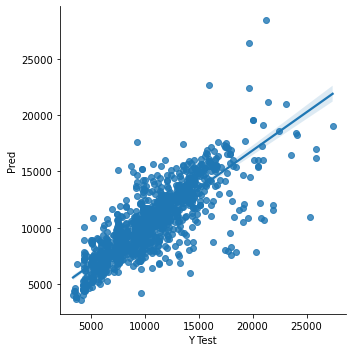

In [215]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':predR},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [231]:
rf_tuning=rf.fit(x,y)

In [232]:
import pickle as pkl
Flight_Prediction_Model='Flight_Prediction.pickle'
pkl.dump(rf_tuning, open(Flight_Prediction_Model,'wb'))